In [ ]:
from datetime import datetime, timedelta
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import geopandas as gpd
import pandas as pd
import xarray as xr
import shapely as shp


In [ ]:
filepath = r"O:\Climate-and-Energy-Policy\CERM\Projects\Wildfire\Data\historical-Europe\historical-burned-area\EFFIS_BurntAreas_2008-2023_medCountries.shp"

# Load shapefile as a GeoDataFrame
historical_fires = gpd.read_file(filepath)


In [ ]:
# Calculate area in hectares
fires = historical_fires.to_crs(epsg=3857)
fires['area_ha'] = fires.geometry.area / 10_000
fires_g50 = fires[fires['area_ha'] >50]

In [23]:
np.min(fires_g50['area_ha'])

50.00435647482899

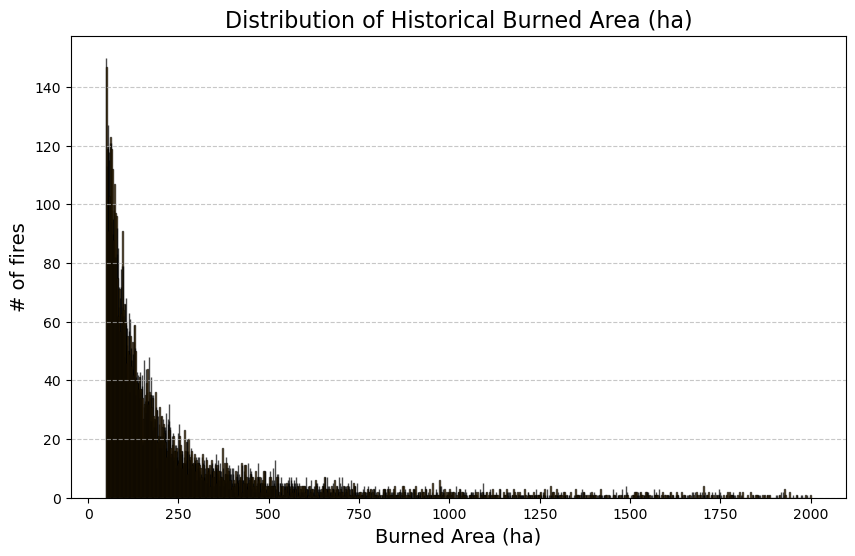

In [27]:
# Define bins from 0 to 3000 in steps of 500
bins = np.arange(50, 2001, 1)

plt.figure(figsize=(10, 6))
plt.hist(fires['area_ha'], bins=bins, color='orange', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Historical Burned Area (ha)', fontsize=16)
plt.xlabel('Burned Area (ha)', fontsize=14)
plt.ylabel('# of fires', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
statistics = fires_g50['area_ha'].describe()
q1 = statistics['25%']
q3 = statistics['75%']
median = statistics['50%']


84.1963161924239

In [53]:
import scipy.stats as stats

data = fires_g50['area_ha'].dropna().to_numpy()  # Remove NaNs and convert to NumPy array

# Fit log-normal distribution
shape, loc, scale = stats.lognorm.fit(data, floc=50) 

sigma = shape 
mu = np.log(scale)


In [51]:
fires_g50.size

168804

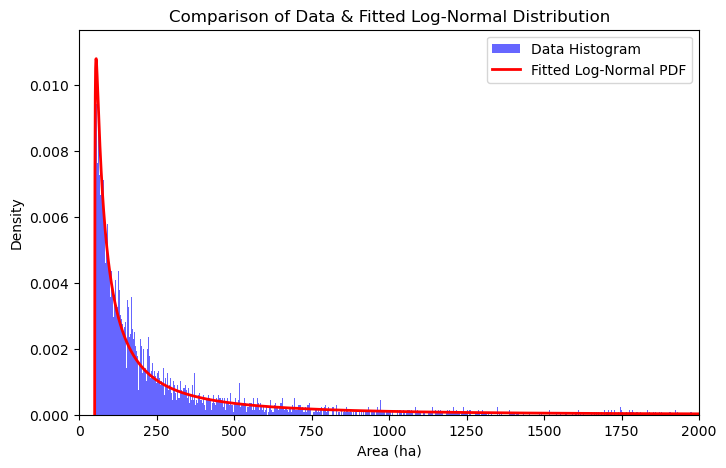

In [54]:
# Generate fitted distribution
x = np.linspace(min(data), max(data), 168804)  # Range of values for PDF
pdf_fitted = stats.lognorm.pdf(x, sigma, loc, scale)  # Compute fitted PDF

# Plot histogram and fitted PDF
plt.figure(figsize=(8, 5))
plt.hist(data, bins=bins, density=True, alpha=0.6, color='b', label="Data Histogram")  # Data histogram
plt.plot(x, pdf_fitted,  'r-', lw=2, label="Fitted Log-Normal PDF")  # Fitted curve
plt.xlim(0, 2000)
plt.xlabel("Area (ha)")
plt.ylabel("Density")
plt.legend()
plt.title("Comparison of Data & Fitted Log-Normal Distribution")
plt.show()

In [56]:
params_df = pd.DataFrame({"sigma": [shape], "loc": [loc], "scale": [scale]})
params_df.to_csv("lognormal_params_EFFIS_fires.csv", index=False)